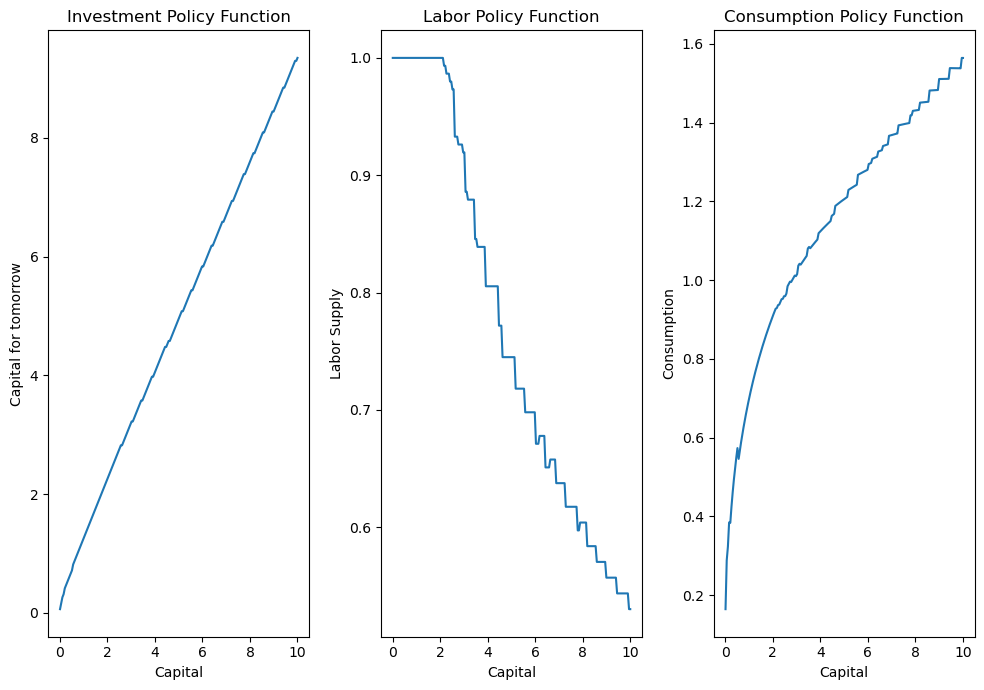

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar

# Define parameters
β = 0.95
δ = 0.05
σ = 2
ν = 2
α = 1 / 3
A = 1
φ = 1

params = {
    "β": 0.95,
    "δ": 0.05,
    "σ": 2,
    "ν": 2,
    "α": 1 / 3,
    "A": 1,
    "φ": 1,
}

def production(k, l, p):
    A = p["A"]
    α = p["α"]
    return A * k**α * l**(1 - α)

# Utility function
def u(c, l):
    return (c ** (1 - σ)) / (1 - σ) - φ * (l ** (1 + 1 / ν)) / (1 + 1 / ν)

def F(k, l):
    return A * k ** α * l ** (1 - α)

# Create a grid for capital
k_min = 0.01
k_max = 10
num_k_points = 200#change back to 200 later 
k_grid = np.linspace(k_min, k_max, num_k_points)

# Create a grid for labor
l_min = 0
l_max = 1
num_l_points = 150 #change back to 150
l_grid = np.linspace(l_min, l_max, num_l_points)

# Initialize the value function
value_function = np.zeros_like(k_grid)

# Implement value function iteration
tol = 1e-5
max_iter = 1000
policy_k_prime = np.zeros_like(k_grid)
policy_l = np.zeros_like(k_grid)
policy_c = np.zeros_like(k_grid)

for iteration in range(max_iter):
    new_value_function = np.zeros_like(k_grid)

    for i, k in enumerate(k_grid):
        max_value = -np.inf
        c_matrix = F(k, l_grid)[:, np.newaxis] + (1 - δ) * k - k_grid
        c_matrix[c_matrix <= 0] = 1e-15
        value_matrix = u(c_matrix, l_grid[:, np.newaxis]) + β * value_function
        max_value_indices = np.unravel_index(np.argmax(value_matrix, axis=None), value_matrix.shape)
        
        max_value = value_matrix[max_value_indices]
        new_value_function[i] = max_value
        policy_k_prime[i] = k_grid[max_value_indices[1]]
        policy_l[i] = l_grid[max_value_indices[0]]
        policy_c[i] = c_matrix[max_value_indices]

    if np.max(np.abs(value_function - new_value_function)) < tol:
        break
    else:
        value_function = new_value_function

# Plot the policy functions
plt.figure(figsize=(10, 7))

plt.subplot(131)
plt.plot(k_grid, policy_k_prime)
plt.xlabel('Capital')
plt.ylabel('Capital for tomorrow')
plt.title('Investment Policy Function')

plt.subplot(132)
plt.plot(k_grid, policy_l)
plt.xlabel('Capital')
plt.ylabel('Labor Supply')
plt.title('Labor Policy Function')

plt.subplot(133)
plt.plot(k_grid, policy_c)
plt.xlabel('Capital')
plt.ylabel('Consumption')
plt.title('Consumption Policy Function')

plt.tight_layout()
plt.show()


### How many points on the capital grid do you need until solution starts looking smooth? 

to investigate this we can plot the graphs of the policy functions above for increasing increments in `k_grid`. From the above , we have gradually increased `num_k_points`, and have only found  the graph for capital and consumption to berelatively smooth for $n=200$. 

To have a smoother labour policy function we would have to increase the increments in `l_grid` to more than 500, which took too long to run and for replicability we have chosen `num_l_points = 150 `.

### How long does your solution take you  ? What do you take away from this?

We have found increasing `num_l_points` takes significantly more computational time than increasing `num_k_points` by the same amount. 

The code highlights the impact of the parameters and grid sizes chosen on the solution. Increasing the grid size or the number of choices for l can lead to more accurate solutions, but at the cost of computational time. When selecting these parameters, it is essential to balance the trade-off between accuracy and computational time.

## 1b) 


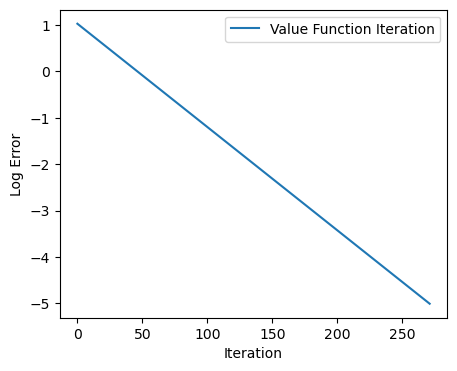

In [2]:
# Create a grid for capital
k_min = 0.001
k_max = 10
num_k_points = 100 
k_grid = np.linspace(k_min, k_max, num_k_points)

# Create a grid for labor
l_min = 0
l_max = 1
num_l_points = 100 
l_grid = np.linspace(l_min, l_max, num_l_points)


value_function = np.zeros_like(k_grid)

# Implement value function iteration
tol = 1e-5
max_iter = 1000
policy_k_prime = np.zeros_like(k_grid)
policy_l = np.zeros_like(k_grid)
policy_c = np.zeros_like(k_grid)

# Implement value function iteration with error logging
def value_function_iteration():
    value_function = np.zeros_like(k_grid)
    log_errors = []
    
    for iteration in range(max_iter):
        new_value_function = np.zeros_like(k_grid)

        for i, k in enumerate(k_grid):
            max_value = -np.inf
            c_matrix = F(k, l_grid)[:, np.newaxis] + (1 - δ) * k - k_grid
            c_matrix[c_matrix <= 0] = 1e-15
            value_matrix = u(c_matrix, l_grid[:, np.newaxis]) + β * value_function
            max_value_indices = np.unravel_index(np.argmax(value_matrix, axis=None), value_matrix.shape)
            
            max_value = value_matrix[max_value_indices]
            new_value_function[i] = max_value

        error = np.max(np.abs(value_function - new_value_function))
        log_errors.append(np.log10(error))

        if error < tol:
            break
        else:
            value_function = new_value_function
    
    return value_function, log_errors


# Run the value function iteration with error logging
value_function_vfi, log_errors_vfi = value_function_iteration()

# Plot the log errors
plt.figure(figsize=(5, 4))
plt.plot(log_errors_vfi, label='Value Function Iteration')
plt.xlabel('Iteration')
plt.ylabel('Log Error')
plt.legend()
plt.show()



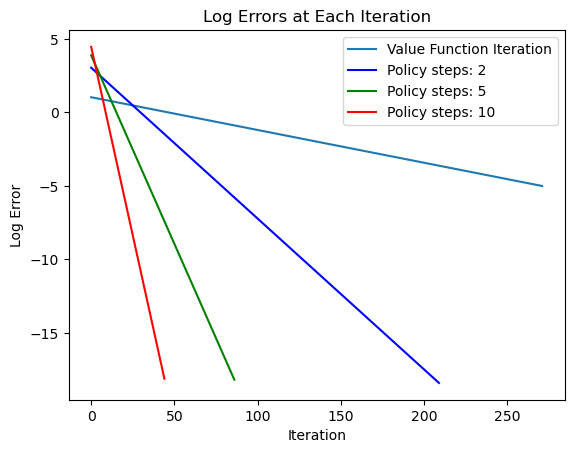

In [3]:
#takes about 2-3 minutes to run for a gridsize of 100
def u(c, l, p):
    σ = p["σ"]
    φ = p["φ"]
    ν = p["ν"]
    return (c**(1 - σ)) / (1 - σ) - φ * (l**(1 + 1 / ν)) / (1 + 1 / ν)

grid_size = 100 #using 100 gridsize so that code doesnt take too long
k_grid = np.linspace(0.001, 10, grid_size)
V0 = np.zeros_like(k_grid)


#we had trouble using grid search therefore we use cubic interpolation as an alternative 
#inner loop bellman policy function 
def bellman_policy(p, V, k_grid, V_prev, policy_steps):
    β = p["β"]
    δ = p["δ"]
    α = p["α"]
    A = p["A"]

    interp_V_prev = interp1d(k_grid, V_prev, kind="cubic", fill_value="extrapolate")

    for i, k in enumerate(k_grid):
        l_grid = np.linspace(0, 1, len(k_grid))
        k_prime_grid = np.linspace(0.001, 10, len(k_grid))

        z = production(k, l_grid, p) + (1 - δ) * k

        k_prime, l = np.meshgrid(k_prime_grid, l_grid)
        c = z.reshape(-1, 1) - k_prime

        value = u(c, l, p) + β * interp_V_prev(k_prime)
        value[c <= 0] = -np.inf

        V[i] = np.max(value)

    for _ in range(policy_steps - 1):
        V_prev = np.copy(V)
        interp_V_prev = interp1d(k_grid, V_prev, kind="cubic", fill_value="extrapolate")
        
        for i, k in enumerate(k_grid):
            l_grid = np.linspace(0, 1, len(k_grid))
            k_prime_grid = np.linspace(0.001, 10, len(k_grid))
            z = production(k, l_grid, p) + (1 - δ) * k

            k_prime, l = np.meshgrid(k_prime_grid, l_grid)
            c = z.reshape(-1, 1) - k_prime

            value = u(c, l, p) + β * interp_V_prev(k_prime)
            value[c <= 0] = -np.inf

            V[i] = np.max(value)

#outer loop for policy function 
def solve_pfi(p, k_grid, V0, policy_steps=1, tol=1e-8, max_iter=1000):
    V = np.copy(V0)
    V_prev = np.copy(V0)

    iteration = 0
    errors = []

    while iteration < max_iter:
        bellman_policy(p, V, k_grid, V_prev, policy_steps)
        error = np.max(np.abs(V - V_prev))

        if error < tol:
            break

        errors.append(error)
        V_prev = np.copy(V)
        iteration += 1

    return V, iteration, errors

policy_steps_values = [2, 5, 10]
colors = ['blue', 'green', 'red']
# Utility function, i put this here because utility function used by value function iteration is different 
def u(c, l):
    return (c ** (1 - σ)) / (1 - σ) - φ * (l ** (1 + 1 / ν)) / (1 + 1 / ν)
# Run the value function iteration with error logging

value_function_vfi, log_errors_vfi = value_function_iteration()

plt.figure()
plt.plot(log_errors_vfi, label='Value Function Iteration')

def u(c, l, p):
    σ = p["σ"]
    φ = p["φ"]
    ν = p["ν"]
    return (c**(1 - σ)) / (1 - σ) - φ * (l**(1 + 1 / ν)) / (1 + 1 / ν)

for i, policy_steps in enumerate(policy_steps_values):
    V0 = np.zeros_like(k_grid)
    V, iterations, errors = solve_pfi(params, k_grid, V0,policy_steps_values[i], max_iter=1000)
    plt.plot(np.log(errors), label=f'Policy steps: {policy_steps}', color=colors[i])

plt.title('Log Errors at Each Iteration')
plt.xlabel('Iteration')
plt.ylabel('Log Error')
plt.legend()
plt.show()





 A steeper decline in the log error indicates a faster convergence. Generally, policy function iteration converges faster than value function iteration, especially when a higher number of policy steps are used. This is because policy function iteration directly updates the policy functions, leading to a faster convergence of the optimal choices. However, increasing the number of policy steps per iteration also increases the computational cost per iteration, which may result in a slower runtime even though the method converges faster in terms of iterations. Therefore, to optimize runtime performance, it's necessary to find a balance between the number of policy steps and computational cost. Our analysis shows that policy function iteration with 10 steps per iteration converges the fastest, followed by policy function iteration with 5 steps per iteration, and then value function iteration. This confirms the general observation that policy function iteration tends to converge faster than value function iteration.
 

## 1c) 
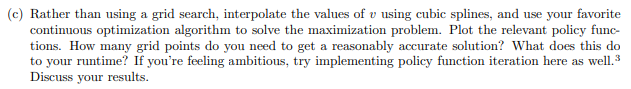

In [4]:
#35 secs to run
def u(c, l):
    σ = 2
    φ = 1
    ν = 2
    return (c**(1 - σ)) / (1 - σ) - φ * (l**(1 + 1 / ν)) / (1 + 1 / ν)

def production(k, l):
    A = 1
    α = 0.3
    return A * k**α * l**(1 - α)

def bellman_policy( V, k_grid, V_prev, policy_steps):
    β = 0.95
    δ = 0.1
    α = 0.3
    A = 1


    interp_V_prev = interp1d(k_grid, V_prev, kind="cubic", fill_value="extrapolate")

    policy_k_prime = np.zeros_like(k_grid)
    policy_l = np.zeros_like(k_grid)

    for i, k in enumerate(k_grid):
        l_grid = np.linspace(0, 1, len(k_grid))
        k_prime_grid = np.linspace(0.001, 10, len(k_grid))

        z = production(k, l_grid) + (1 - δ) * k

        k_prime, l = np.meshgrid(k_prime_grid, l_grid)
        c = z.reshape(-1, 1) - k_prime

        value = u(c, l) + β * interp_V_prev(k_prime)
        value[c <= 0] = -np.inf

        V[i] = np.max(value)
        max_idx = np.argmax(value)
        policy_k_prime[i] = k_prime_grid[max_idx // len(k_grid)]
        policy_l[i] = l_grid[max_idx % len(k_grid)]
        
    for _ in range(policy_steps - 1):
        V_prev = np.copy(V)
        interp_V_prev = interp1d(k_grid, V_prev, kind="cubic", fill_value="extrapolate")
        
        for i, k in enumerate(k_grid):
            l_grid = np.linspace(0, 1, len(k_grid))
            k_prime_grid = np.linspace(0.001, 10, len(k_grid))
            z = production(k, l_grid) + (1 - δ) * k

            k_prime, l = np.meshgrid(k_prime_grid, l_grid)
            c = z.reshape(-1, 1) - k_prime

            value = u(c, l, p) + β * interp_V_prev(k_prime)
            value[c <= 0] = -np.inf

            V[i] = np.max(value)
            max_idx = np.argmax(value)
            policy_k_prime[i] = k_prime_grid[max_idx // len(k_grid)]
            policy_l[i] = l_grid[max_idx % len(k_grid)]

    return policy_k_prime, policy_l

# policy_k_prime, policy_l = bellman_policy( V, k_grid, V_prev, policy_steps)

def solve_pfi( k_grid, V0, policy_steps=1, tol=1e-8, max_iter=1000):
    V = np.copy(V0)
    V_prev = np.copy(V0)

    iteration = 0
    errors = []

    policy_k_prime = np.zeros_like(k_grid)
    policy_l = np.zeros_like(k_grid)

    while iteration < max_iter:
        policy_k_prime, policy_l = bellman_policy( V, k_grid, V_prev, policy_steps)
        error = np.max(np.abs(V - V_prev))

        if error < tol:
            break

        errors.append(error)
        V_prev = np.copy(V)
        iteration += 1

    return V, policy_k_prime, policy_l, iteration, errors



grid_size = 100 #n = 200 takes too many minutes
k_grid = np.linspace(0.001, 10, grid_size)
V0 = np.zeros_like(k_grid)
policy_steps = 1

p = params
V, policy_k_prime, policy_l, iterations, errors = solve_pfi( k_grid, V0, policy_steps)


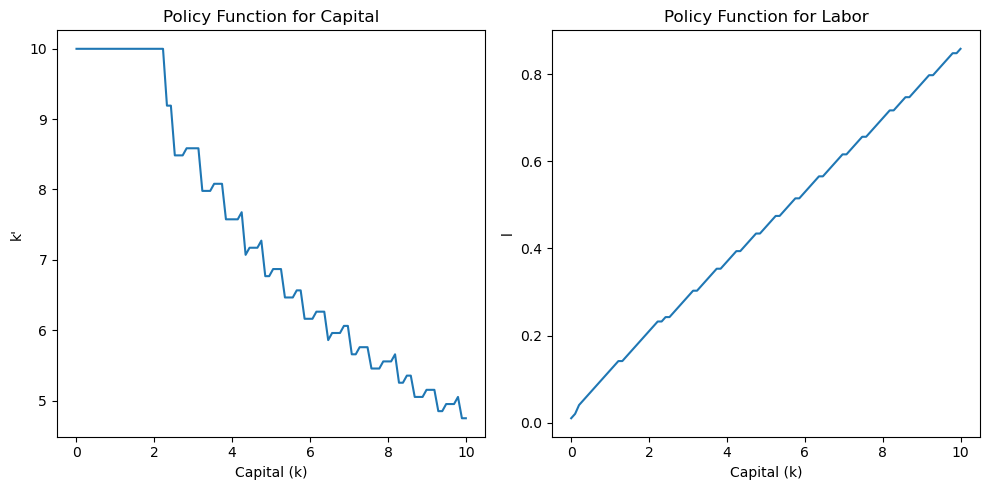

In [5]:
plt.figure(figsize=(10, 5))

# Plot policy function for capital
plt.subplot(1, 2, 1)
plt.plot(k_grid, policy_k_prime)
plt.xlabel('Capital (k)')
plt.ylabel("k'")
plt.title('Policy Function for Capital')

# Plot policy function for labor
plt.subplot(1, 2, 2)
plt.plot(k_grid, policy_l)
plt.xlabel('Capital (k)')
plt.ylabel('l')
plt.title('Policy Function for Labor')

plt.tight_layout()
plt.show()

From adjusting 'grid_size' from 50,100,150,200. the line for labor is the smoothest when 'grid_size=200', and is still rather cyclical for capital, moreover n=200 takes a few minutes to run. we get the same findings as before, increasing the grid size increases computational time substantially even after vectorisation. Using cubic splines to approximate the value function and policy functions provides a reasonably accurate solution and for a gridsize of n=100, is  substantially faster than grid search. The speed could be further improved by increasing step size.

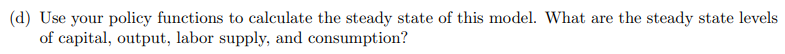

we're looking for a point where k' = k and l doesn't change

In [10]:
# Find the steady state for capital and labor
k_steady_state_idx = np.argmin(np.abs(policy_k_prime - k_grid))
k_steady_state = k_grid[k_steady_state_idx]
l_steady_state = policy_l[k_steady_state_idx]

output_steady_state = production(k_steady_state, l_steady_state)
consumption_steady_state = output_steady_state + (1 - δ) * k_steady_state - policy_k_prime[k_steady_state_idx]

print(f"Steady state capital: {k_steady_state:.4f}")
print(f"Steady state labor: {l_steady_state:.4f}")
print(f"Steady state output: {output_steady_state:.4f}")
print(f"Steady state consumption: {consumption_steady_state:.4f}")


Steady state capital: 6.2630
Steady state labor: 0.5556
Steady state output: 1.1491
Steady state consumption: 0.8359


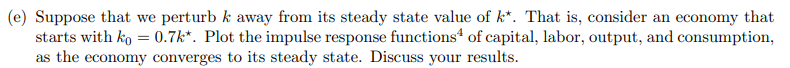

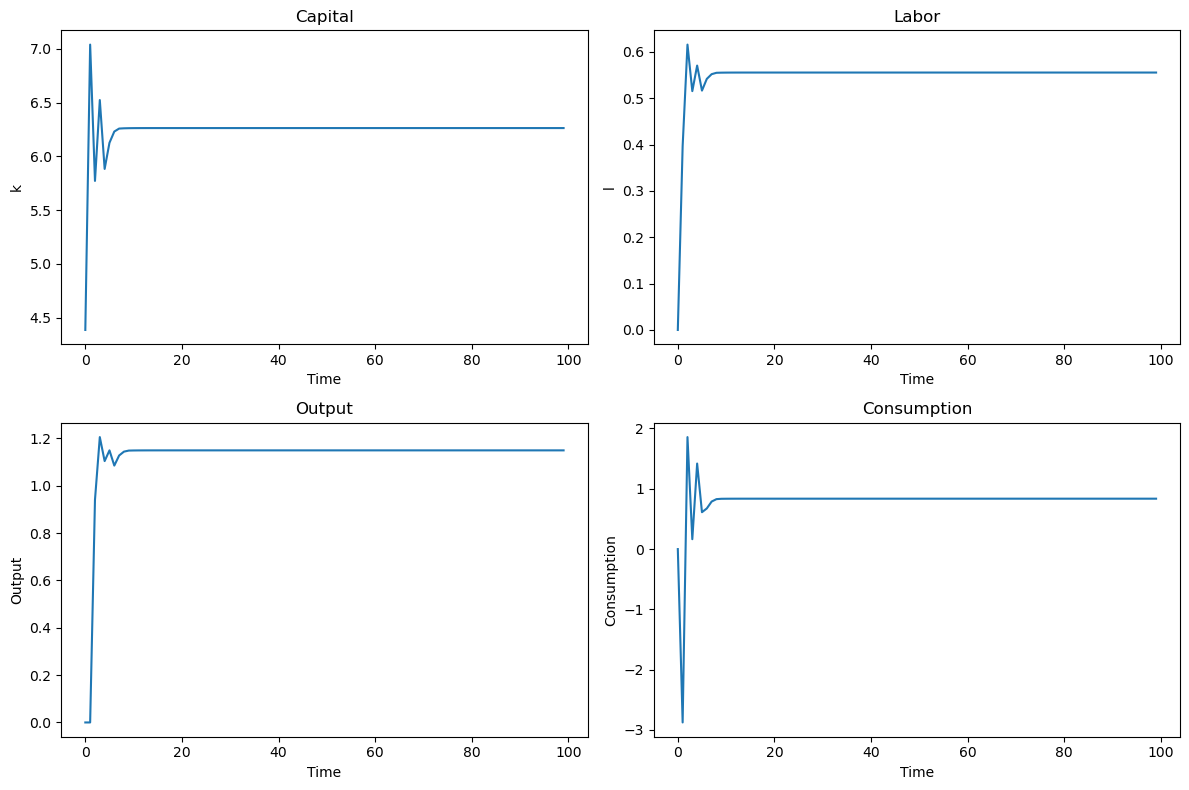

In [11]:
#simulates the model for 100 periods, starting from an initial capital value of 0.7 * k*. It updates capital and labor using the policy functions and computes output and consumption at each step
# Parameters for the simulation
T = 100  # Number of periods
k_initial = 0.7 * k_steady_state  # Initial capital

# Arrays to store the time series
k_series = np.zeros(T)
l_series = np.zeros(T)
output_series = np.zeros(T)
consumption_series = np.zeros(T)


# Set the initial capital value
k_series[0] = k_initial

# Interpolation functions for the policy functions
policy_k_prime_interp = interp1d(k_grid, policy_k_prime, kind="cubic", fill_value="extrapolate")
policy_l_interp = interp1d(k_grid, policy_l, kind="cubic", fill_value="extrapolate")

# Simulate the model
for t in range(1, T):
    k_series[t] = policy_k_prime_interp(k_series[t - 1])
    l_series[t] = policy_l_interp(k_series[t - 1])
    output_series[t] = production(k_series[t - 1], l_series[t - 1])
    consumption_series[t] = output_series[t] + (1 - δ) * k_series[t - 1] - k_series[t]

# Plot the impulse response functions
time = np.arange(T)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time, k_series)
plt.title("Capital")
plt.xlabel("Time")
plt.ylabel("k")

plt.subplot(2, 2, 2)
plt.plot(time, l_series)
plt.title("Labor")
plt.xlabel("Time")
plt.ylabel("l")

plt.subplot(2, 2, 3)
plt.plot(time, output_series)
plt.title("Output")
plt.xlabel("Time")
plt.ylabel("Output")

plt.subplot(2, 2, 4)
plt.plot(time, consumption_series)
plt.title("Consumption")
plt.xlabel("Time")
plt.ylabel("Consumption")

plt.tight_layout()
plt.show()

the initial perturbation away from the steady-state value of capital caused the economy to adjust its path. As the economy adjusts to this new initial capital level, it tends to stabilize over time and approaches the steady-state values.The graphs indicate the interdependencies between capital, labor, output, and consumption. this shows that the growth model converges to a unique stable steady state in the long run. 

Theory suggests: 
Capital (k): Beginning with a diminished capital level (0.7 * k*), the higher returns on capital result in increased investments. Consequently, capital builds up and ultimately approaches the steady-state value over time.
Labor (l): Due to the elevated returns on capital, firms may seek additional labor to boost production. This may initially lead to a rise in labor supply, which will then settle at the steady-state level as capital accumulation decelerates.
Output (y): As both capital and labor grow, the economy's total output (production) experiences an increase as well. The expansion of output slows down when approaching the steady state, and eventually, output stabilizes at its steady-state value.
Consumption (c): Increased output allows for the possibility of greater consumption, as households have access to more resources. Nonetheless, a portion of the heightened output is allocated for capital accumulation (investment). As the economy moves towards the steady state, investment decelerates, and consumption settles at its steady-state level.